[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/main?filepath=notebooks%2FAula_17_Clusterizacao.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_17_Clusterizacao.ipynb)

# Análise de Agrupamentos (*Clusterização*)

**Objetivos**: Aprender o que é Clusterização usando a biblioteca `Scikit-Learn`.

## O que é Clusterização?

Classificação de objetos em diferentes grupos, cada um dos quais deve conter os objetos semelhantes

## Quantos Clusters?

* Inércia
	* Soma das distâncias quadradas das observações para o centro do cluster mais próximo
	* Observação gráfica
* Silhueta
	* Escore de Desempenho

## Scikit-Learn

Usar a função [`sklearn.clusters.KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Argumentos: 
* `n_clusters` - `int` - Número de Clusters a ser extraído
    * padrão - 8
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

### Retorna:
* Objeto `estimator` do Scikit-Learn
    * `.inertia_`: Soma das distâncias quadradas das observações para o centro do cluster mais próximo

## Exemplo com um dataset fictício

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

from jupyterthemes import jtplot
jtplot.style()

In [2]:
blob_centers = np.array(
    [[ 0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 0.8]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=123)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", fontsize=14, rotation=0)

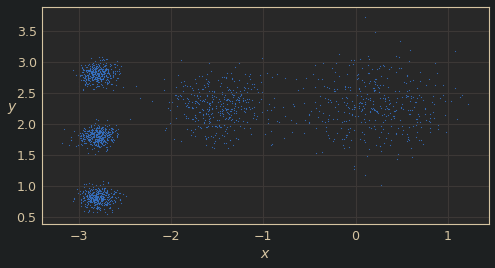

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### `Fit`

Sinta-se à vontade em manipular o número de centroides com a variável `k`

In [5]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters=k, random_state=123)
y_pred = kmeans.fit_predict(X)

### Embaixo do Capô

In [6]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$y$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

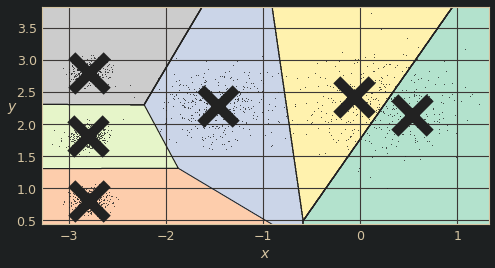

In [7]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

#### Animação do Algoritmo K-means

In [8]:
from IPython.display import YouTubeVideo

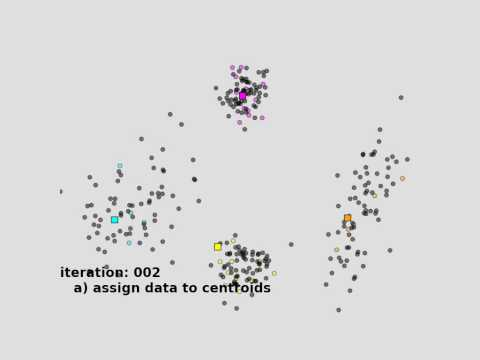

In [9]:
YouTubeVideo('5I3Ei69I40s', width=800, height=600)

## Número de Clusters?

* `kmeans.inertia_` - Inércia
* `sklearn.metrics.silhouette_score` - Silhueta

In [10]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

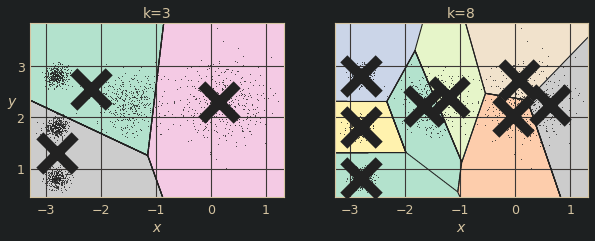

In [11]:
kmeans_k3 = KMeans(n_clusters=3, random_state=123)
kmeans_k8 = KMeans(n_clusters=8, random_state=123)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "k=3", "k=8")
plt.show()

### Plotando as Inércias

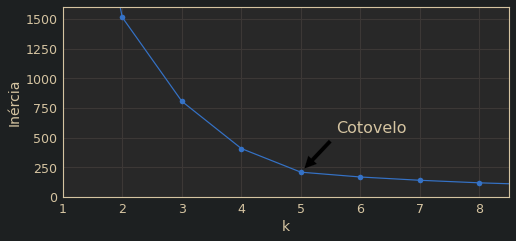

In [12]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inércia", fontsize=14)
plt.annotate('Cotovelo',
             xy=(5, inertias[4]),
             xytext=(0.65, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1600])
plt.show()

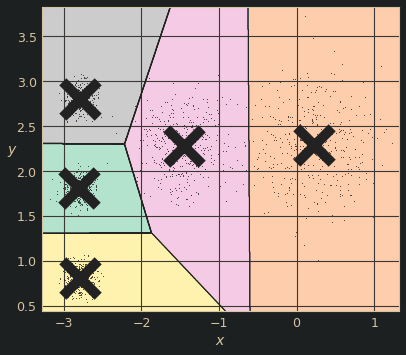

In [13]:
plot_decision_boundaries(kmeans_per_k[5-1], X)
plt.show()

### Plotando a Silhueta

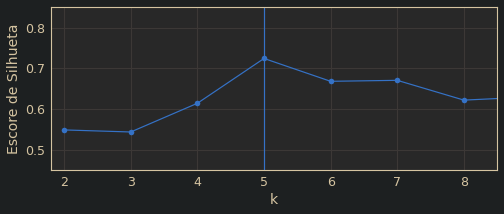

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.vlines(x=[5], ymin=0, ymax=1)
plt.xlabel("k", fontsize=14)
plt.ylabel("Escore de Silhueta", fontsize=14)
plt.axis([1.8, 8.5, 0.45, 0.85])
plt.show()

## Atividade - Clusterização com o dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

>Obs: usar `random_state = 123`

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()

In [ ]:
print('Atributos de X: ', X.shape[1])